In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [22]:
ad = pd.read_csv('archive/anime_data.csv')
ud = pd.read_csv('archive/user_data.csv')

ud.drop(columns='name', inplace=True)
ad.drop(columns='title', inplace=True)

ad.to_csv('ad.csv')

In [23]:
pk = pd.read_csv('ad.csv')

In [4]:
def get_year(series: pd.Series) -> pd.Series:
    return series.str.slice(0, 4).astype(int)

ad.fillna("0000", inplace=True)
ad = ad.assign(year=ad.aired_from.pipe(get_year))
ad = ad[ad.year != 0]

ud = ud.assign(year=ud.joined.pipe(get_year))

In [5]:
!pip3 install -U matplotlib


In [6]:
import matplotlib.pyplot as plt

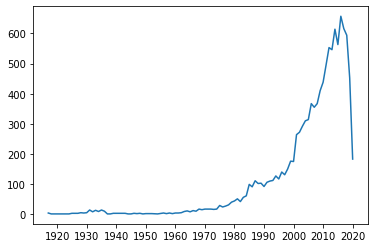

In [7]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.plot(ad \
  .groupby('year').aired_from.count())

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))


plt.show()

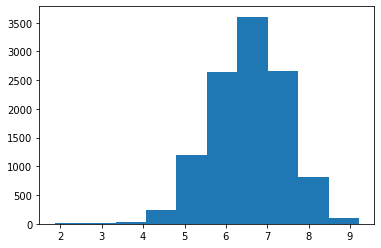

In [8]:
plt.hist(ad.score)

plt.show()

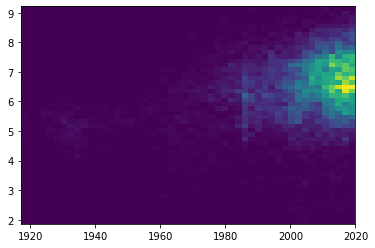

In [9]:
plt.hist2d(ad.year, 
           ad.score,
            bins=50
          )

plt.show()

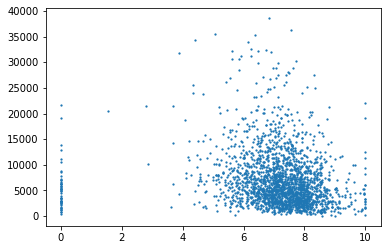

In [10]:
udn=ud[ud.episodes_watched < 40000]

plt.scatter(udn.mean_score, udn.episodes_watched, s=1.5)

plt.show()

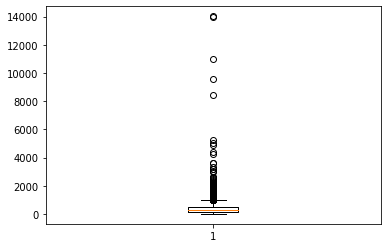

In [11]:
plt.boxplot(ud.completed)
plt.show()

In [12]:
def time4episode(s):
    hms = s.split()
    if hms[-1] == 'ep':
        hms = hms[:-2]
    sec4ep = 0
    for i in range(1, len(hms), 2):
        if hms[i] == 'hr':
            sec4ep += int(hms[i-1]) * 3600
        elif hms[i] == 'min':
            sec4ep += int(hms[i-1]) * 60
        elif hms[i] == 'sec':
            sec4ep += int(hms[i-1])
    return sec4ep

def parse_duration(series):
    return time4episode(series.str)
    
ad.duration.apply(time4episode)
ad = ad.assign(watching_time=ad.duration.apply(time4episode) * ad.episodes)
ad.to_csv('anime_data_new.csv', sep='\t')

In [21]:
ad

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title_english,type,year,watching_time
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,TV,1998,37440
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Prétear: The New Legend of Snow White,TV,2001,17940
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Space Pirate Captain Harlock,TV,1978,63000
3,10003,2008-01-01T00:00:00+00:00,0000,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,0000,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",0000,OVA,2008,1800
4,10005,2007-03-31T00:00:00+00:00,0000,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,0000,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,0000,Movie,2007,5700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,999,1996-07-24T00:00:00+00:00,1998-02-04T00:00:00+00:00,28 min per ep,3,"['Action', 'Comedy', 'Drama', 'Ecchi', 'Horror...",6053,0000,5991.0,R - 17+ (violence & profanity),6.45,2201,Unknown,Finished Airing,"[{'mal_id': 10, 'name': 'Production I.G'}]",A renegade scientist in San Francisco has foun...,Blue Seed Beyond,OVA,1996,5040
11331,9990,2011-09-24T00:00:00+00:00,0000,55 min,1,"['Dementia', 'Drama']",8174,0000,7611.0,PG-13 - Teens 13 or older,6.10,491,Original,Finished Airing,[],One of the must-see gems making its premiere a...,Midori-ko,Movie,2011,3300
11332,9991,1981-08-23T00:00:00+00:00,0000,1 hr 30 min,1,"['Kids', 'Adventure']",11291,0000,8455.0,G - All Ages,5.84,185,Unknown,Finished Airing,[],"TV anime created as a part of ""24-Hour Televis...",Bremen 4,Special,1981,5400
11333,9996,2011-04-07T00:00:00+00:00,2012-01-26T00:00:00+00:00,25 min per ep,39,"['Historical', 'Samurai', 'Seinen']",3423,Spring 2011,533.0,R - 17+ (violence & profanity),7.99,2608,Manga,Finished Airing,"[{'mal_id': 5, 'name': 'Bee Train'}]",The story is set during Japan's Sengoku Jidai ...,0000,TV,2011,58500


In [13]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


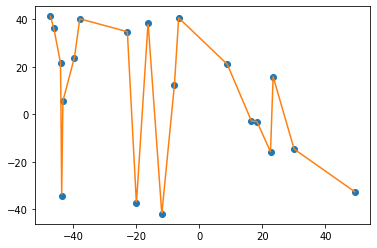

In [14]:
import random
from scipy.interpolate import interp1d

rand_x = [((random.random() -0.5) * 100) for _ in range(20)]
rand_x.sort()
rand_y = [((random.random() -0.5) * 100) for _ in range(20)]
f = interp1d(rand_x, rand_y, kind = 'linear')
print(f)
newx = np.linspace(rand_x[0], rand_x[-1] , num=1000, endpoint=True)

plt.plot(rand_x, rand_y, 'o', newx, f(newx), '-')
plt.show()

In [15]:
#https://github.com/scipy/scipy/blob/master/scipy/interpolate/_interpolate.py 
#619

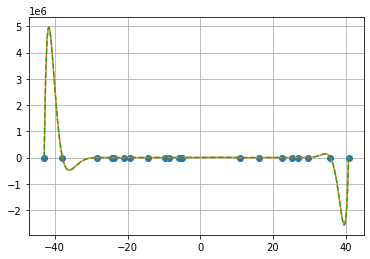

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
x = [((random.random() - 0.5) * 100) for _ in range(20)]
y = [((random.random() - 0.5) * 100) for _ in range(20)]

def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1
        p2=1
        for i in range(len(x)):
            if i!=j:
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z

xnew=np.linspace(min(x), max(x), 1000)
ynew=[lagranz(x,y,i) for i in xnew]
f = BarycentricInterpolator(x, y)
plt.plot(x,y,'o',xnew,ynew, '-', xnew, f(xnew), '--')
plt.grid(True)
plt.show()

In [17]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    min_val = min(array)
    max_val = max(array)
    if (len(array) == 1):
        min_val = array[0] - 0.5
        max_val = array[0] + 0.5
    thick = (max_val - min_val) / bins 
    if (thick == 0):
        thick = 0.1
    borders = np.arange(min_val, max_val, thick)
    val = [0 for _ in range(bins)]
    for el in array:
        idx = min(int((el - min_val) / thick), bins - 1)
        val[idx] = val[idx] + 1
    return (np.array(val), borders)

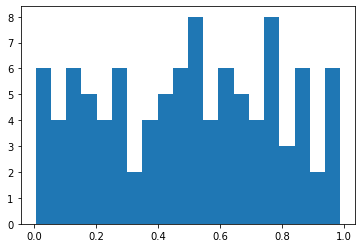

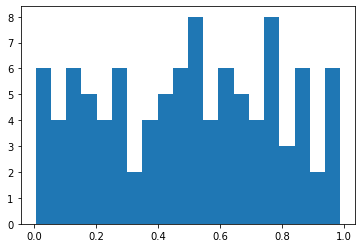

(array([6, 4, 6, 5, 4, 6, 2, 4, 5, 6, 8, 4, 6, 5, 4, 8, 3, 6, 2, 6]),
 array([0.00484925, 0.05404332, 0.10323739, 0.15243146, 0.20162553,
        0.2508196 , 0.30001367, 0.34920774, 0.39840181, 0.44759588,
        0.49678995, 0.54598403, 0.5951781 , 0.64437217, 0.69356624,
        0.74276031, 0.79195438, 0.84114845, 0.89034252, 0.93953659]))

In [18]:
import timeit

data = [random.random() for i in range(100)]
b = 20
val, borders = fast_hist(data, bins=b)
w = (max(data) - min(data)) / b
if w == 0:
    w = 1/b

plt.hist(data, bins=b)
plt.show()
plt.bar(borders, val, align='edge', width=w)
plt.show() 

fast_hist(data, bins=b)

41.3 µs ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.6 ms ± 389 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


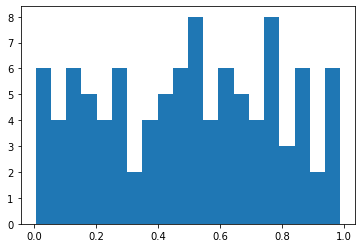

In [19]:
%timeit fast_hist(data, bins=b)
%timeit plt.hist(data, bins=b)